# Analisis Katalog Digital Library ITB

In [1]:
# Revisi tanggal
# 9:07PM UTC+7, 4 Mei 2021

## Pendahuluan

### Edisi Pertama

Salah satu program kerja di divisi Penelitian HIMATIKA ITB 2019/2020 adalah "Lex Luthor's Database". Secara sederhana, proker ini bertugas untuk mencatat segala hal (baik kondisi internal maupun eksternal himpuunan) ke sebuah database. Dengan adanya database ini, diharapkan anggota himpunan (termasuk badan pengurus himpunan) dapat menerapkan kebijakan yang berbasis data.

Satu hal yang termasuk dalam proses pencatatan data ini adalah data mengenai Tugas Akhir mahasiswa matematika. Sampai saat saya menulis ini, hanya ada dua cara untuk mengetahui data TA ini. Pertama, dengan datang langsung ke Perpustakaan Program Studi Matematika, dan menggunakan fasilitas komputer disana, atau dengan mengakses website Digital Library ITB. Namun kedua cara ini memiliki kekurangan yang jelas:

Anda perlu datang ke perpus hanya untuk mencari data TA.
Fasilitas "Pencarian Lanjut" di website Digital Library yang rusak. Keadaan inilah yang mendasari mengapa data Tugas Akhir perlu disimpan ke sebuah database. [Walau ini hanya separuh dari cerita sebenarnya]
Ditugaskan untuk melakukan pendataan ini, saya mencoba berdiskusi mengenai sharing data TA dari pihak perpustakaan prodi. Namun karena hal ini mengalami kegagalan, saya memutuskan untuk melakukan scrapping website Digital Library.

### Perubahan saat ini
Tulisan ini adalah versi ketiga. Selain penambahan jumlah dokumen yang tersimpan dalam katalog, versi ini memberikan penjelasan yang lebih deskriptif pada tahapan-tahapan kegiatan. Selain itu, tulisan ini juga menyertakan beberapa eksperimen yang dapat dilakukan pada data katalog perpustakaan.

## Pengambilan data
Jika kita melihat katalog di Perpustakaan Digital ITB, semua informasi dokumen disusun berdasarkan sebuah angka *identifier* yang unik. Sebagai contoh, *identifier* 54675 akan merujuk pada halaman yang berisi informasi [sebuah tesis yang dibuat oleh Dwi Lerian Friatnasary](https://digilib.itb.ac.id/index.php/gdl/view/54675/) . Menariknya lagi, identifier pada katalog disusun secara menaik dari [angka 1](https://digilib.itb.ac.id/index.php/gdl/view/1).

Dari fakta ini, kita dapat melakukan hal yang dikenal dengan nama [*web scrapping*](https://en.wikipedia.org/wiki/Web_scraping). Kita cukup mengunjungi satu-per-satu halaman dari identifier 1 sampai halaman-dokumen-yang-paling-baru; dan untuk setiap kunjungan, kita tinggal mengambil informasi-informasi yang penting. Sebenarnya, itulah hal yang saya lakukan pada versi pertama tulisan ini. Malangnya, cara tersebut perlu mengunjungi 54000+ halaman: membuatnya memerlukan waktu yang sangat lama, dan juga merugikan server situs perpustakaan.

Untungnya, pihak perpustakaan menyediakan fitur [OAI-PMH](https://en.wikipedia.org/w/index.php?title=Open_Archives_Initiative_Protocol_for_Metadata_Harvesting&oldid=1007458904). Hal ini memungkinkan kita untuk dengan mudah mengambil data katalog dalam format yang terstruktur (XML) dan ukuran data yang lebih kecil, ketimbang ketika berurusan dengan berkas HTML. Sebagai contoh, silahkan lihat [tampilan OAI-PMH untuk *identifier* 54675](https://digilib.itb.ac.id/oai.php?verb=GetRecord&identifier=54675&metadataPrefix=oai_dc). Namun di sisi lain, tidak semua informasi di versi kunjungan situs juga ada di versi OAI-PMH. Contohnya adalah informasi mengenai `Staf Input/Edit` dan `File`. Menimbang lebih banyak keuntungan yang didapatkan, saya memilih menggunakan OAI-PMH untuk mengambil data katalog perpustakaan.

### Persiapan

In [2]:
# module yang kita butuhkan:

# Untuk mengakses halaman di internet
from urllib.request import urlopen
# Untuk mengubah data XML ke tipe data dict-nya Python
from xmltodict import parse
# Sebagai cache jika terjadi error dalam proses download
import pickle
# opsional: untuk melihat progress proses
from tqdm import tqdm

Selanjutnya, ada baiknya kita menyimpan alamat OAI-PMH dan informasi (yang tersimpan dalam bentuk tag XML) apa saja yang akan kita ambil.

In [3]:
URL   = 'https://digilib.itb.ac.id/oai-ristek.php?' \
        'verb=GetRecord&identifier={}&metadataPrefix=oai_dc'

items = ['dc:title', 'dc:creator', 'dc:contributor', 'dc:nidn', 'dc:subject', 'dc:date',
         'dc:language', 'dc:type', 'dc:Keyword', 'dc:Institution', 'dc:description']

Lalu, membuat fungsi untuk mengubah data OAI-PMH menjadi tipe data `dict`.

In [4]:
def dictify(identifier):
    result = {}
    
    # mengakses alamat OAI-PMH
    with urlopen(URL.format(identifier)) as f:
        # membaca data ke format UTF-8
        raw = f.read().decode('utf8', 'ignore')
    
    # menelurusi letak tag-tag XML yang diinginkan
    data = parse(raw)['OAI-PMH']['GetRecord']['record']['metadata']['oai_dc:dc']

    # mengolah data...
    for i in items: result[i] = data[i]
    return result

In [5]:
# output dari fungsi
dictify(54675)

{'dc:title': 'KAJIAN PERKEMBANGAN DAN APLIKASI BIOREAKTOR MEMBRAN AERASI',
 'dc:creator': 'Lerian Friatnasary, Dwi',
 'dc:contributor': 'Prof. Ir. I Gede Wenten, M.Sc., Ph.D.;Dr. Khoiruddin, S.T., M.T.;',
 'dc:nidn': None,
 'dc:subject': 'FTI - Teknik Kimia',
 'dc:date': '2021-04-30 10:33:01',
 'dc:language': 'Indonesia',
 'dc:type': 'Thesis',
 'dc:Keyword': ': aerasi, air limbah, biofilm, membran, pengolahan air, polutan.',
 'dc:Institution': 'INSTITUTE TEKNOLOGI BANDUNG',
 'dc:description': 'KAJIAN PERKEMBAGAN DAN APLIKASI BIOREAKTOR MEMBRAN AERASI\r\nOleh\r\nDwi Lerian Friatnasary\r\nNIM: 23018009\r\n(Program Studi Magister Teknik Kimia)\r\nBioreaktor membran aerasi (BRMA) merupakan teknologi inovatif untuk menangani permasalahan yang terdapat pada proses pengolahan air limbah konvensional menggunakan lumpur aktif, seperti tingkat penyisihan nutrien dan polutan yang rendah, pembentukan busa, dan ketidakstabilan biologis. Namun dalam pengoperasiannya, BRMA masih mengalami kendala, ya

### Mengunduh katalog
Saat ini, ada 54676 data buku yang tersimpan di katalog perpustakaan. Dalam keadaan seperti ini, ada baiknya proses mengunduh dilakukan secara berkelompok. Maksudnya, kita mengunduh 1000 data, lalu menyimpannya sebagai berkas sementara di komputer, dan mengunduh 1000 data selanjutnya. Di akhir proses, kita cukup menggabungkan semua berkas sementara menjadi satu berkas (data katalog) yang utuh. Metode ini menguntungkan karena jika ada error dalam proses mengunduh, kita tidak kehilangan semua data yang sudah diproses. Lagipula, cara ini tidak memerlukan banyak memori (RAM) komputer, dan prosesnya dapat ditunda jika koneksi internet sedang jelek.

In [6]:
def batch_download(start, end, size=100):
    """
    Mengambil data OAI-PMH dari identifier start sampai end (inklusif).
    Melakukannya secara berkelompok dalam ukuran size, lalu menyimpannya
    sebagai pickle.
    """
    
    for batch in range(start, end+1, size):
        
        # ambil data secara berkelompok
        result = {}
        for num in tqdm(range(batch, batch+size), desc=str(batch)):
            tmp = str(num)
            result[tmp] = dictify(tmp)

        # simpan sebagai sebuah pickle
        with open('pickle/pickle_{}'.format(batch), 'wb') as outfile:
            pickle.dump(result, outfile, -1)

Walaupun saya memiliki katalog hasil unduhan versi pertama dan kedua, saya melihat beberapa [banyak] informasi katalog perpustakaan telah diperbarui/diganti. Sebagai contoh, informasi yang sebelumnya tersimpan pada *identifier* 47451 telah diganti menjadi ke nomor [50125](https://digilib.itb.ac.id/index.php/gdl/view/50125/). Menimbang perubahan-perubahan pada data lama, ada baiknya saya kembali mengunduh katalog perpustakaan dari awal lagi.

In [7]:
# proses ini butuh 202m 31s
# batch_download(33501, 54700)

Selanjutnya, kita dapat menggabungkan berkas-berkas pickle ke dalam beberapa format. Dalam kegiatan ini, saya memilih format TSV (Tab Separated Value) untuk menyimpan katalog mentah, sekaligus mempermudah orang lain jika ingin menggunakan data katalog ini.

In [8]:
#import pandas as pd

#result = {}
#for n in range(1, 54700, 100):
#    with open('pickle/pickle_{}'.format(n), 'rb') as outfile:
#        result.update(pickle.load(outfile))
        
#katalog = pd.DataFrame.from_dict(result, orient='index')
#katalog.to_csv("katalog.tsv", sep="\t", index=False)

## Merapikan data

In [9]:
import pandas as pd

# baca TSV
katalog = pd.read_csv("katalog.tsv", sep="\t")

# karena kita banyak berurusan dengan string, ada
# baiknya nilai NA dinyatakan sebagai string kosong
# (untuk menghindari peluang error yang sulit dicari)
katalog.fillna('', inplace=True)

Seperti banyak data yang didapatkan langsung dari lingkungan, banyak informasi dalam katalog yang tidak rapi. Untuk itu, ada baiknya kita melihat dan mencoba memahami data yang kita dapatkan, sekaligus mencatat perapian yang dilakukan -- yang mungkin dapat menimbulkan bias dalam analisis.

Pertama, mari kita lihat sampel dari data katalog kita

In [10]:
katalog.sample(3)

,dc:title,dc:creator,dc:contributor,dc:nidn,dc:subject,dc:date,dc:language,dc:type,dc:Keyword,dc:Institution,dc:description
36166,,",",,,,,Indonesia,Thesis,,INSTITUTE TEKNOLOGI BANDUNG,
49209,PUSAT SENI DAN BUDAYA SEBAGAI ETALASE BUDAYA K...,"Wiba Febrina, Cantika","Dr.-Ing. Erika Yuni Astuti, S.T., M.T.;",0718067907,SAPPK - Arsitektur,2020-09-11 08:15:51,Indonesia,Thesis,"Budaya, Seni, Bekasi, Pertunjukan, Galeri, Urb...",INSTITUTE TEKNOLOGI BANDUNG,Pusat Seni dan Budaya adalah suatu wadah atau ...
17773,PERANCANGAN LINTASAN PUBLIK DI KAWASAN JALAN M...,MEDIA (NIM : 25206008) ; Pembimbing : Ir. Basa...,"Pembimbing : Ir. Basauli Umar Lubis, MSA, Phd",,SAPPK - Arsitektur,2017-09-27 15:24:10,Indonesia,Thesis,"Lintasan publik, sistem penghubung, pusat kota...",INSTITUTE TEKNOLOGI BANDUNG,Pada kawasan pusat kota jarak antar bangunan r...


Ada baiknya kita menghapus dc: dari setiap nama kolom agar lebih intuitif.

In [11]:
new_name = {x:x[3:] for x in katalog}
katalog = katalog.rename(columns=new_name)

Terlihat ada beberapa kolom di katalog dengan tipe data ordinal/kelompok, ada baiknya kita mengecek apakah ada pengelompokan yang kurang wajar.

In [12]:
print(set(katalog['language']))
print(set(katalog['type']))
print(set(katalog['Institution']))

{'Indonesia'}
{'Thesis'}
{'INSTITUTE TEKNOLOGI BANDUNG'}


Karena kolom language, type, dan Institution masing-masing hanya memiliki satu nilai, kita dapat dengan aman membuangnya.

In [13]:
katalog.drop(columns=['language', 'type', 'Institution'], inplace=True)

Kita juga dapat melakukan hal yang sama untuk kolom `subject`. Melihat hasil dari `set(katalog['subject'])`, saya memutuskan untuk menggabungkan/mengganti beberapa nama berikut

In [14]:
new_name = {
    'FITB - Teknik geologi': 'FITB - Teknik Geologi',
    'Teknik Sipil': 'FTSL - Teknik Sipil',
    'Teknik Kelautan': 'FTSL - Teknik Kelautan',
    'Teknik Lingkungan': 'FTSL - Teknik Lingkungan',
    'Teknik Geofisika - FTTM': 'FTTM - Teknik Geofisika',
    'Sekolah Bisnis dan Manajemen': 'SBM',
    'Sekolah Ilmu dan Teknologi Hayati': 'SITH',
    'Oseanografi': 'FITB - Oseanografi',
    'Biologi': 'SITH - Biologi',
    'Farmasi': 'SF - Farmasi',
    'Magister Bisnis dan Administrasi - Teknologi': 'SBM - Bisnis dan Administrasi Teknologi',
    'FSRD- Desain': 'FSRD - Desain'}

f = lambda val: new_name[val] if val in new_name else val
katalog['subject'] = katalog['subject'].apply(f)

Melihat banyak kolom yang berisi tipe data string, ada baiknya kita mengecek apakah data yang tidak wajar di dalam kolom-kolom tersebut. Hal tersebut dapat berupa:
* ukuran yang tidak wajar, seperti terlalu pendek (contoh: kolom description yang hanya berisi huruf "a").
* penanda data yang tidak terdefinisi, seperti "-", "undefined", "no abstract", dan sejenisnya.
* adanya data yang tidak seharusnya (contoh, tambahan data NIM pada kolom creator, atau tag HTML yang masih terikut).
* data yang jelas rusak.

Berbeda dengan kolom lainnya, variasi tulisan pada kolom description jauh lebih besar. Kolom ini memiliki konsistensi yang sangat rendah dalam penulisan format abstrak, spasi, paragraf, tanda baca, berbagai macam saltik, dan bahkan penanda untuk "abstrak tidak tersedia". Pada kolom ini, saya memutuskan untuk hanya menyatukan tulisan dalam satu paragraf -- dan beberapa perapian yang sama dengan kolom-kolom lainnya.

In [15]:
import re

def cleaned(col_name, threshold):
    # hapus data dengan panjang yang tidak lebih
    # panjang daripada nilai threshold
    f = lambda val: val if len(val)>threshold else ''
    katalog[col_name] = katalog[col_name].apply(f)
    
    # hapus tag HTML yang ada di data
    f = lambda val: re.sub('<[^<]+?>', '', val)
    katalog[col_name] = katalog[col_name].apply(f)
    
    # menghapus spasi ganda, dan garis-baru (newline)
    f = lambda val: re.sub('[ \r\n]+', ' ', val)
    katalog[col_name] = katalog[col_name].apply(f)

In [16]:
%%time

cleaned('title', 2)
cleaned('creator', 4)
cleaned('subject', 0)
cleaned('contributor', 4)
cleaned('Keyword', 2)
cleaned('description', 13)

CPU times: user 18.7 s, sys: 165 ms, total: 18.9 s
Wall time: 18.9 s


In [17]:
# mari lihat sejenak perkembangan saat ini
katalog.sample(3)

,title,creator,contributor,nidn,subject,date,Keyword,description
22230,PENENTUAN PENAMBAHAN KAPASITAS PRODUKSI DENGAN...,"NADYA SUTANTRA (NIM : 13413034), GABRIELA","Suprayogi, Ph.D.",,FTI - Teknik Industri,2017-09-27 11:39:11,"kapasitas produksi, model matematis, outsource...",CV AP merupakan salah satu usaha yang bergerak...
22738,KARAKTERISASI RESERVOIR UNTUK MENENTUKAN BATAS...,"- NIM: 22314019 , JUVENTA",Dr. Fatkhan,,FTTM - Teknik Geofisika,2017-10-09 10:24:09,"reservoir, hidrokarbon, transformasi data log,...","Dalam eksplorasi hidrokarbon, salah satu tanta..."
31470,PENGEMBANGAN SISTEM MARKETPLACE PADA PASAR TRA...,"NOVIANTO - NIM : 13513092 , VICKO","Dr. Bayu Hendradjaya, S.T., M.T.",,STEI - Teknik Informatika,2018-03-19 11:05:29,"Marketplace, pasar virtual.",Adanya kemajuan teknologi smartphone dan inter...


Sepertinya sebagian data pada kolom `creator` juga mengandung data NIM (Nomor Induk Mahasiswa). Ada baiknya data ini diletakkan pada sebuah kolom baru, seperti kolom `nim`.

In [18]:
def get_nim(val):
    i = val
    # hilangkan karakter non-bilangan
    val = re.sub('\D', ' ', val)

    # hilangkan spasi berlebih
    val = re.sub('[ ]+', ' ', val).strip()
    
    # jika saat ini panjang val < 8, jelas tidak ada NIM
    if len(val)<8: return ''
    
    # kasus NIM ditulis dalam bentuk: XXX YY ZZZ
    pat = re.compile('(\d{3} \d{2} \d{3})')
    tmp = re.split(pat, val)
    if tmp[0]!=val:
        # jika ada, hilangkan spasi agar jadi XXXYYZZZ
        val = ' '.join([x.replace(' ', '') for x in tmp])

    # terakhir, hilangkan semua bilangan yang panjangnya
    # bukan 8, diasumsikan bilangan ini bukan bagian dari
    # suatu format NIM...
    val = ' ' .join([x for x in val.split() if len(x)==8])
    return val

In [19]:
katalog['nim'] = katalog['creator'].apply(get_nim)

Setelah data NIM dipindahkan ke kolom baru, kita dapat menghapus NIM dari kolom `creator`. Lebih lanjut, saya memutuskan untuk juga menghapus semua kemunculan angka lebih dari satu digit.

In [20]:
def clean_creator(val):
    # contoh format yang dicari: (NIM : 123 45 678)
    val = re.sub('[\[\(].*?[\d ]+[\]\)]', '', val)
    # contoh format yang dicari: Nim : 123 45 678
    val = re.sub(' NIM.*?[\d ]+', '', val, flags=re.IGNORECASE)
    # hapus kemunculan angka yang lebih dari satu digit
    val = re.sub('\d\d+', '', val)
    
    return val

Tentu, ada banyak perapian lain yang dapat dilakukan, misalnya mencoba mengonsistenkan format penulisan kolom `contributor`, `creator`, `title`, dan `Keyword`. Lagipula, tindakan yang kita lakukan saat ini belum menangkap semua kerusakan data yang terjadi. Walaupun demikian, saya rasa perapian-perapian ini sudah cukup untuk dapat digunakan pada tahap-tahap berikutnya.

In [21]:
# Mari lihat perkembangan saat ini
katalog.sample(5)

# dan simpan sebagai file baru
katalog.to_csv("katalog_cleaned.tsv", sep="\t", index=False)

## Eksplorasi data

In [22]:
import pandas as pd

# baca TSV
katalog = pd.read_csv("katalog_cleaned.tsv", sep="\t")

Pada bagian ini, kita akan mencoba melihat bagaimana informasi tersusun pada data katalog, dan mencari ide eksperimen apa saja yang dapat kita lakukan pada katalog ini. Pertama-tama, mari kita lihat bagaimana sebaran data NA (*Not Available*, Tidak Tersedia) pada data katalog.

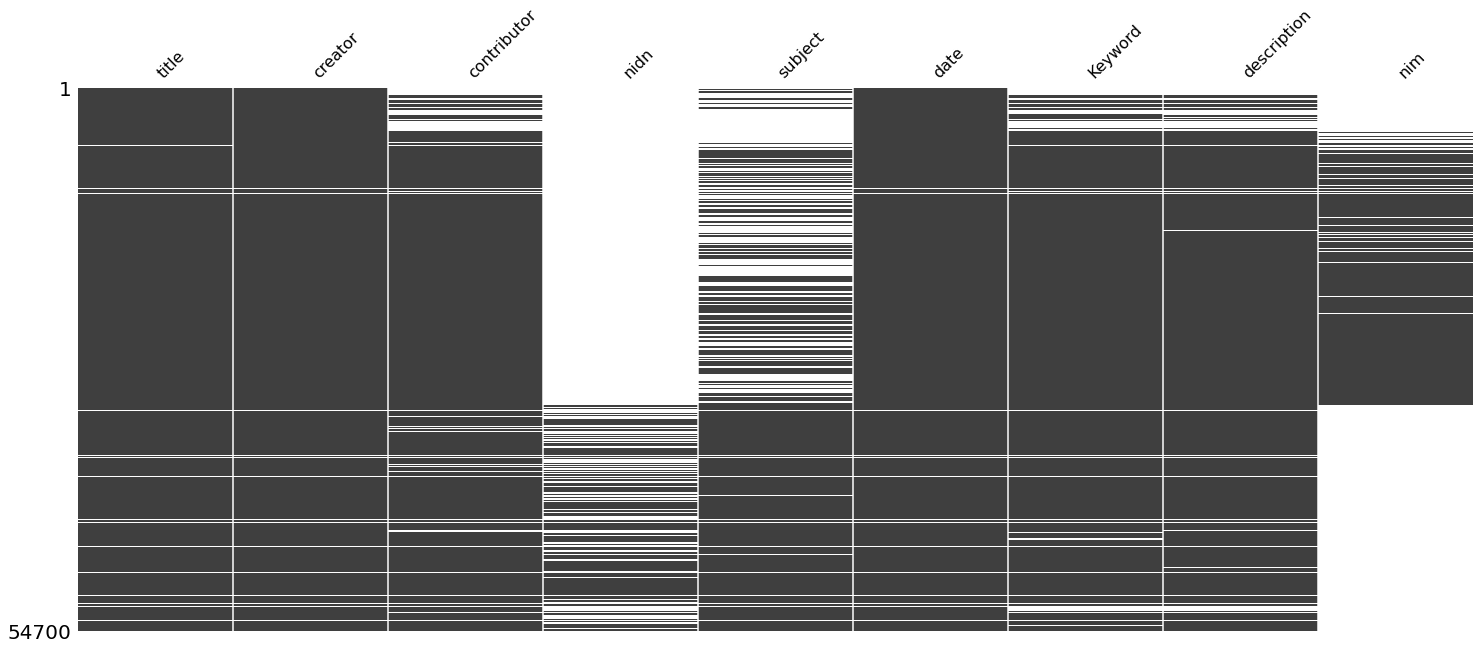

In [23]:
import missingno as msno

msno.matrix(katalog, sparkline=False);

Dari melihat sekilas, kita melihat bahwa data NIM tidak pernah diikutkan lagi (setidaknya pada kolom `creator`) sejak kolom `nidn` mulai aktif diisi. Selain itu, kita melihat kolom ini juga mengakibatkan peningkatan keterisian kolom `subjek`.

Dari grafik tersebut, kita melihat ada baris yang semua datanya kosong (ditandai oleh garis putih). Baris-baris ini berhubungan dengan dokumen yang ditarik dari katalog, atau akibat nomor *identifier* yang dokumen yang diubah (ingat bahwa nomor *identifier* nilainya selalu meningkat).

Mari kita lihat bagaimana katalog diisi, berdasarkan informasi dari kolom `date`

In [24]:
#

Hal lain yang membuat saya penasaran adalah ukuran teks pada kolom `description`: bagaimana panjang teks `description` secara rata rata?

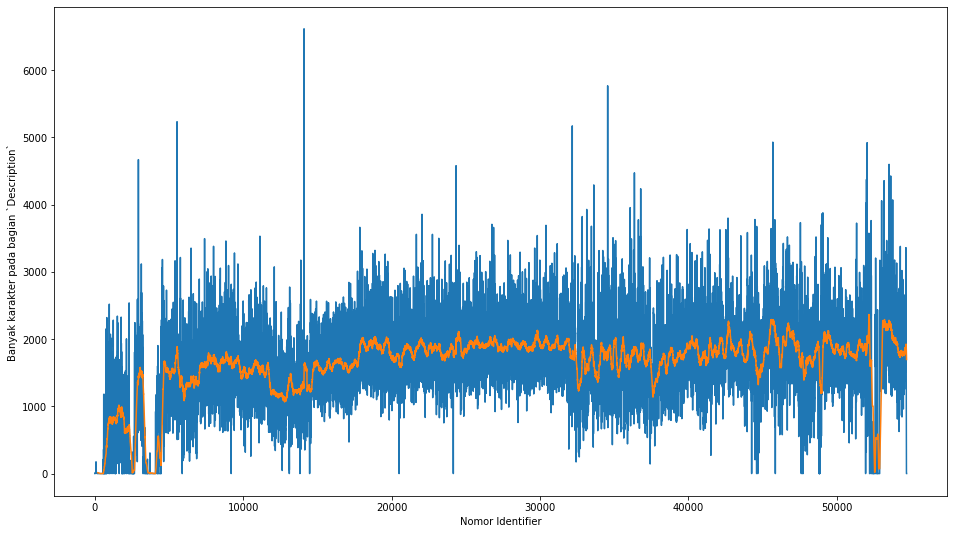

In [25]:
# panjang teks kolom description
size_desc = katalog['description'].fillna('').apply(len)

# hitung moving average
ma5 = size_desc.rolling(window=5).mean()
ma200 = size_desc.rolling(window=200).mean()

# plot
ma5.plot(figsize=(16,9))
ax = ma200.plot(figsize=(16,9))
ax.set_xlabel("Nomor Identifier")
ax.set_ylabel("Banyak karakter pada bagian `Description`");

Coba kita lihat kontribusi dokumen dari setiap program studi

In [26]:
#katalog[['title','subject']].groupby(['subject']).count().to_dict()

## Eksperimen

Ada beberapa eksperimen yang dilakukan dengan data ini
* Kemiripan dua dokumen
* Pengelompokan dokumen
* Sistem rekomendasi (dosen, dokumen, ...)